In [239]:
from dolfin import *
import numpy as np

In [240]:
# Have the compiler generate code for evaluating derivatives
parameters['form_compiler']['no-evaluate_basis_derivatives'] = False

## 1D derivative evaluation

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

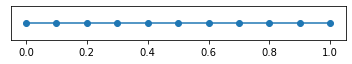

In [241]:
mesh = UnitIntervalMesh(10)
V = FunctionSpace(mesh, 'CG', 1)
#f = interpolate(Expression('3*x[0]*x[0]*x[1]-2*x[1]*x[1]*x[0]', degree = 1), V)
el = V.element()
plot(mesh)
mesh.coordinates()

In [242]:
dofmap = V.dofmap()
for x,cell in enumerate(cells(mesh)):
    print("Cell Number: ",x,"\tCell Index: ",dofmap.cell_dofs(cell.index()))
    print("Cell Coordinates: \n", el.tabulate_dof_coordinates(cell),"\n")

Cell Number:  0 	Cell Index:  [10  9]
Cell Coordinates: 
 [[0. ]
 [0.1]] 

Cell Number:  1 	Cell Index:  [9 8]
Cell Coordinates: 
 [[0.1]
 [0.2]] 

Cell Number:  2 	Cell Index:  [8 7]
Cell Coordinates: 
 [[0.2]
 [0.3]] 

Cell Number:  3 	Cell Index:  [7 6]
Cell Coordinates: 
 [[0.3]
 [0.4]] 

Cell Number:  4 	Cell Index:  [6 5]
Cell Coordinates: 
 [[0.4]
 [0.5]] 

Cell Number:  5 	Cell Index:  [5 4]
Cell Coordinates: 
 [[0.5]
 [0.6]] 

Cell Number:  6 	Cell Index:  [4 3]
Cell Coordinates: 
 [[0.6]
 [0.7]] 

Cell Number:  7 	Cell Index:  [3 2]
Cell Coordinates: 
 [[0.7]
 [0.8]] 

Cell Number:  8 	Cell Index:  [2 1]
Cell Coordinates: 
 [[0.8]
 [0.9]] 

Cell Number:  9 	Cell Index:  [1 0]
Cell Coordinates: 
 [[0.9]
 [1. ]] 



In [243]:
coordinate = 0.3
p = Point(coordinate) 

In [244]:
cell_id = mesh.bounding_box_tree().compute_first_entity_collision(p)
cell_id

2

In [245]:
cell = Cell(mesh, cell_id)

In [246]:
el_1d = V.element()
cell_coordinates = cell.get_vertex_coordinates()
print("Coordinates: ", cell_coordinates)
orientation = cell.orientation()
print("Orientation: ", orientation)
d_dx = el_1d.evaluate_basis_derivatives_all(1, np.array([coordinate]), cell_coordinates, orientation)
d_dx

Coordinates:  [0.2, 0.3]
Orientation:  0


array([-10.,  10.])

The left gradient and right gradient with respect to corresponding degree of freedom

## 2D derivative evaluation

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 0.5],
       [0.5, 0.5],
       [1. , 0.5],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

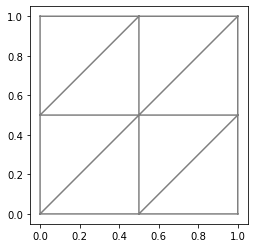

In [247]:
mesh = UnitSquareMesh(2, 2)
V = FunctionSpace(mesh, 'CG', 1)
#f = interpolate(Expression('3*x[0]*x[0]*x[1]-2*x[1]*x[1]*x[0]', degree = 1), V)
el = V.element()
plot(mesh)
mesh.coordinates()

In [248]:
dofmap = V.dofmap()
for x,cell in enumerate(cells(mesh)):
    print("Cell Number: ",x,"\tCell Index: ",dofmap.cell_dofs(cell.index()))
    print("Cell Coordinates: \n", el.tabulate_dof_coordinates(cell),"\n")

Cell Number:  0 	Cell Index:  [3 6 4]
Cell Coordinates: 
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]] 

Cell Number:  1 	Cell Index:  [3 1 4]
Cell Coordinates: 
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]] 

Cell Number:  2 	Cell Index:  [6 8 7]
Cell Coordinates: 
 [[0.5 0. ]
 [1.  0. ]
 [1.  0.5]] 

Cell Number:  3 	Cell Index:  [6 4 7]
Cell Coordinates: 
 [[0.5 0. ]
 [0.5 0.5]
 [1.  0.5]] 

Cell Number:  4 	Cell Index:  [1 4 2]
Cell Coordinates: 
 [[0.  0.5]
 [0.5 0.5]
 [0.5 1. ]] 

Cell Number:  5 	Cell Index:  [1 0 2]
Cell Coordinates: 
 [[0.  0.5]
 [0.  1. ]
 [0.5 1. ]] 

Cell Number:  6 	Cell Index:  [4 7 5]
Cell Coordinates: 
 [[0.5 0.5]
 [1.  0.5]
 [1.  1. ]] 

Cell Number:  7 	Cell Index:  [4 2 5]
Cell Coordinates: 
 [[0.5 0.5]
 [0.5 1. ]
 [1.  1. ]] 



In [249]:
# Where to evaluate
x = np.array([0.7, 0.9])

In [250]:
# Find the cell with point
x_point = Point(*x) 
cell_id = mesh.bounding_box_tree().compute_first_entity_collision(x_point)
cell_id

7

In [251]:
cell = Cell(mesh, cell_id)
coordinate_dofs = cell.get_vertex_coordinates()
coordinate_dofs

[0.5, 0.5, 0.5, 1.0, 1.0, 1.0]

In [252]:
dofmap = V.dofmap()
cell_dofs = dofmap.cell_dofs(cell_id)
cell_dofs

array([4, 2, 5], dtype=int32)

In [253]:
element = V.element()
d_dx = element.evaluate_basis_derivatives_all(1, x, coordinate_dofs, cell.orientation() )
d_dx

array([-3.99680289e-15, -2.00000000e+00, -2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  0.00000000e+00])

In [254]:
d_dx = d_dx.reshape((len(cell_dofs), -1))
d_dx

array([[-3.99680289e-15, -2.00000000e+00],
       [-2.00000000e+00,  2.00000000e+00],
       [ 2.00000000e+00,  0.00000000e+00]])

In [264]:
for i, dof in enumerate(cell_dofs):
    print([dofmap.tabulate_local_to_global_dofs()[dof], d_dx[i]])

[4, array([-3.99680289e-15, -2.00000000e+00])]
[2, array([-2.,  2.])]
[5, array([2., 0.])]


## 3D derivative evaluation

In [256]:
mesh3 = BoxMesh(Point(0, 0, 0),
               Point(1, 1, 1),
               1,1,1)

In [257]:
V3 = FunctionSpace(mesh3, 'CG', 1)
#f = interpolate(Expression('3*x[0]*x[0]*x[1]-2*x[1]*x[1]*x[0]', degree = 1), V)
el3 = V3.element()
mesh3.coordinates()

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [258]:
dofmap3 = V3.dofmap()
for x,cell in enumerate(cells(mesh3)):
    print("Cell Number: ",x,"\tCell Index: ",dofmap3.cell_dofs(cell.index()))
    print("Cell Coordinates: \n", el3.tabulate_dof_coordinates(cell),"\n")

Cell Number:  0 	Cell Index:  [1 5 6 2]
Cell Coordinates: 
 [[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]] 

Cell Number:  1 	Cell Index:  [1 5 3 2]
Cell Coordinates: 
 [[0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 1.]] 

Cell Number:  2 	Cell Index:  [1 0 3 2]
Cell Coordinates: 
 [[0. 0. 0.]
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 1.]] 

Cell Number:  3 	Cell Index:  [1 7 6 2]
Cell Coordinates: 
 [[0. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [1. 1. 1.]] 

Cell Number:  4 	Cell Index:  [1 0 4 2]
Cell Coordinates: 
 [[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 1.]
 [1. 1. 1.]] 

Cell Number:  5 	Cell Index:  [1 7 4 2]
Cell Coordinates: 
 [[0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 1. 1.]] 



In [259]:
# Where to evaluate
x = np.array([0.2, 0.9, 0.2])

In [260]:
# Find the cell with point
x_point = Point(*x) 
cell_id = mesh3.bounding_box_tree().compute_first_entity_collision(x_point)
cell_id

3

In [261]:
cell3 = Cell(mesh3, cell_id)
coordinate_dofs3 = cell.get_vertex_coordinates()
coordinate_dofs

[0.5, 0.5, 0.5, 1.0, 1.0, 1.0]

In [262]:
dofmap3 = V3.dofmap()
cell_dofs3 = dofmap3.cell_dofs(cell_id)
cell_dofs3

array([1, 7, 6, 2], dtype=int32)

In [263]:
element3 = V3.element()
d_dx3 = element3.evaluate_basis_derivatives_all(1, x, coordinate_dofs3, cell.orientation() )
d_dx3

array([ 1.11022302e-16, -1.00000000e+00, -1.11022302e-16,  5.55111512e-17,
        1.00000000e+00, -1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00])